In [74]:
import numpy as np
import xarray as xr
import netCDF4 as nc
from os.path import join, exists
import matplotlib
from matplotlib import pyplot as plt
from calendar import monthrange

In [83]:
monthrange(1960,1)
print(f"{monthrange(1961,2)[1]:04}")

0028


In [29]:
%matplotlib inline
matplotlib.rcParams["font.size"] = 18

In [30]:
datadir = '/scratch/jf4241/ecmwf_data/era5_data/2022-08-14/'

In [86]:
!ls -ltrh {datadir}

total 195M
-rw-rw-r--. 1 jf4241 root 40M Aug 14 22:29 1959-01.nc
-rw-rw-r--. 1 jf4241 root 36M Aug 14 22:30 1959-02.nc
-rw-rw-r--. 1 jf4241 root 40M Aug 14 22:32 1959-03.nc
-rw-rw-r--. 1 jf4241 root 39M Aug 14 22:34 1959-04.nc
-rw-rw-r--. 1 jf4241 root 40M Aug 14 22:36 1959-05.nc


In [87]:
da = xr.open_dataset(join(datadir,"1959-01.nc"))

In [88]:
print(da.coords)
print(da.data_vars)

Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level      (level) int32 10 100 500 850
  * time       (time) datetime64[ns] 1959-01-01 ... 1959-01-31T18:00:00
Data variables:
    z        (time, level, latitude, longitude) float32 ...
    t        (time, level, latitude, longitude) float32 ...
    u        (time, level, latitude, longitude) float32 ...
    v        (time, level, latitude, longitude) float32 ...


Text(0.5, 1.0, '')

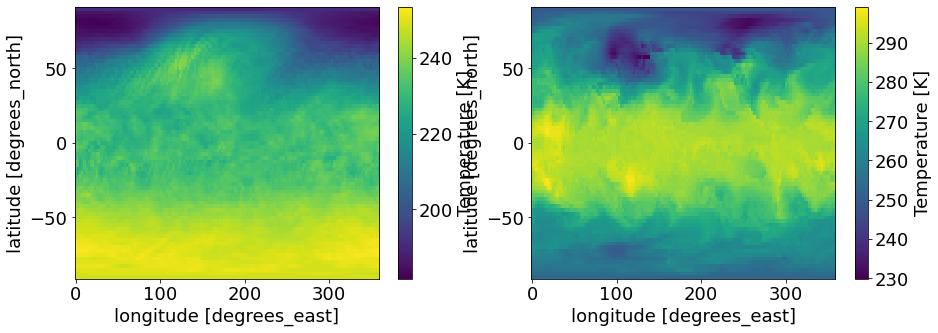

In [91]:
fig,axes = plt.subplots(ncols=2,figsize=(15,5)) #, subplot_kwargs={"title": ""})
xr.plot.imshow(
    da['t'].isel(time=0).sel(level=10), x='longitude', y='latitude', ax=axes[0]
)
axes[0].set_title("")
xr.plot.imshow(
    da['t'].isel(time=0).sel(level=850), x='longitude', y='latitude', ax=axes[1]
)
axes[1].set_title("")


In [42]:
180/2.5

72.0

In [16]:
90/2.5 + 1

37.0